In [1]:
from solnet import SolNet

In [2]:
kyiv = SolNet(50.45,30.52,1.5,locations=1)

Gathering data from base location...


In [3]:
trainList, covTrainList, testList, covTestList = kyiv.dataTransforming()

In [1]:
import pandas as pd
import math
import numpy as np
import statistics
import formulas as fm
import evaluation
import scipy.stats as stat

In [2]:
x = [2,0,4,5,6]
y = [1,4,5,4,6]

In [3]:
correl = stat.pearsonr(x,y)[0]

In [4]:
correl

0.554870952023094

In [5]:
evaluation.metrics(x,y)

TypeError: Index(...) must be called with a collection of some kind, 'Metrics' was passed

In [7]:
print(fm.var(x))
print(fm.conditional_bias_1(x,y))
print(fm.resolution(x,y))

5.8
1.0625
2.4725


In [4]:
5.8+1.0625-2.4725

4.39

In [5]:
fm.mse(x,y)

3.8

In [6]:
print(fm.var(y))
print(fm.conditional_bias_2(x,y))
print(fm.discrimination(x,y))

3.5
3.8
5.0


In [7]:
3.5+3.8-5

2.3

In [3]:
y_unique = np.unique(y)
x_conditional = []
for i in range(len(y_unique)):
    bools = np.equal(y,y_unique[i])
    locations = np.where(bools)
    xGiveny = []
    for i in range(len(locations[0])):
        xGiveny.append(x[locations[0][i]]) 
    conditional_mean = np.mean(xGiveny)
    x_conditional.append(conditional_mean)

In [4]:
y_unique

array([1, 4, 5, 6])

In [5]:
x_conditional

[2.0, 2.5, 4.0, 6.0]

In [6]:
np.mean(np.square(np.subtract(y_unique,x_conditional)))

1.0625

In [7]:
fm.conditional_bias_1(x,y)

1.0625

In [19]:
trues = [False, True, False, True, False]

In [25]:
loc = np.where(trues)

In [32]:
loc[0][0]

1

In [33]:
for i in range(len(loc[0])):
    print(x[loc[0][i]])

0
5


In [3]:
fm.MSE(x,y)

0.6

In [5]:
np.subtract(x,2)

array([0, 1, 2, 3, 4])

In [6]:
test = fm.circle_pattern(5-1)

In [7]:
from matplotlib import pyplot as plt

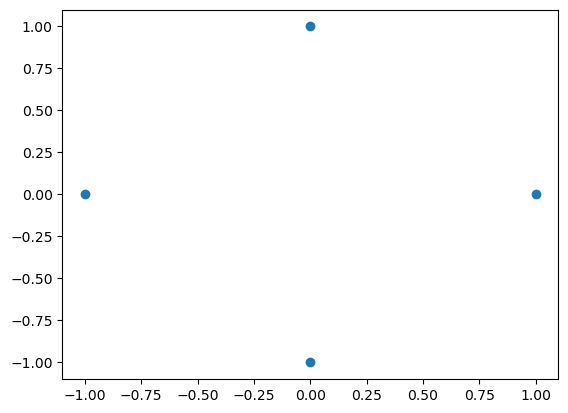

In [8]:
plt.scatter(test['Sine'],test['Cosine'])

In [17]:
test_pd = pd.DataFrame({"Locations":np.linspace(0,4,5)})
test_pd_2 = pd.DataFrame({"Locations":np.linspace(0,5,5)})

In [18]:
test_pd['loc_norm'] = 2 * math.pi * test_pd["Locations"] / test_pd["Locations"].max()
test_pd_2['loc_norm'] = 2 * math.pi * test_pd_2["Locations"] / test_pd_2["Locations"].max()

In [19]:
test_pd

,Locations,loc_norm
0,0.0,0.000000
1,1.0,1.570796
2,2.0,3.141593
3,3.0,4.712389
4,4.0,6.283185


In [20]:
test_pd_2

,Locations,loc_norm
0,0.00,0.000000
1,1.25,1.570796
2,2.50,3.141593
3,3.75,4.712389
4,5.00,6.283185


In [1]:
import SolNet

In [2]:
myModel = SolNet.SolNet.model(50,20,"MyModel",2.4,3,2017,gpu_available=True)

Fetching Source Model data

Additional location 1...

Additional location 2...



GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Data gathered

Transforming data: Removing unused variables, scaling, featurisation 

Creating model 

Training model (this can take a while)



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.5 M 
4 | fc            | Sequential       | 7.2 K 
---------------------------------------------------
2.5 M     Trainable params
0         Non-trainable params
2.5 M     Total params
10.186    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]